#**Tarea 2 - MER, Modelo relacional y SQL**
En la presente tarea Ud deberá, a partir de una especificación de requerimientos, crear un MER, su posterior Modelo relacional y responder consultas usando SQL.


*   La tarea es individual.
*   Para responder a las consultas utilice las celdas ya definidas para ello.
*   El notebook debe estar bien presentado.
*   Todas las celdas de código deben estar ejecutadas.
*   La entrega de la tarea incluye una interrogación.
*   Los archivos que deben entregar son los siguientes: (a) El presente notebook, (b) un script SQL, llamado createDB.sql, para la creación de las tablas y (c) un script, llamado insert.sql, que contenga la inserción de registros.
*   Para entregar incluya (a),(b) y (c) en un archivo comprimido.


**Fecha de entrega:** 16 de Octubre hasta hasta las 23h59, vía Aula Virtual.

#**Especificación de requerimientos**

Un concesionario de autos vende autos nuevos, autos usados y además posee un servicio técnico que proporciona algunos servicios. Las reglas del negocio son las siguientes:
* Un vendedor puede vender muchos autos, pero un auto es vendido sólo por un vendedor.
* Un cliente puede comprar muchos autos pero cada auto es comprado sólo por un cliente.
* Un vendedor genera una única factura por cada auto que vende.
* Cualquier persona puede llevar su auto al servicio técnico del concesionario y aunque no haya comprado un auto será registrado como cliente.
* Cada visita al servicio técnico genera un ticket de servicio.
* Un auto puede ser atendido por muchos mecánicos y a su vez cada mecánico puede trabajar en varios autos.

Plantee un MER, que permita responder al menos los siguientes requerimientos: <br>

1. Cuáles son los mecánicos que han realizado la mayor cantidad de trabajos durante el último año?.
2. Cuás es el servicio que el concesionario realiza de manera más frecuente?
3. Cuál es el top 3 de los vendedores de autos?
4. Para un cliente determinado, cual es el detalle (auto, tipo de servicio, mecánicos, valor, etc.) de los servicios realizados sobre su(s) vehículo(s)?
5. Proponga dos consultas que involucren al menos JOIN y/o GROUP BY.  




# **(I) Inserte aquí el MER.**

Incluya en la siguiente lista todos los supuestos y comentarios que ayudarán a comprender sus decisiones de diseño:
*
*
*
*
*

# **(II) Inserte aquí el Modelo relacional (opción Relational schema en ERDPlus)**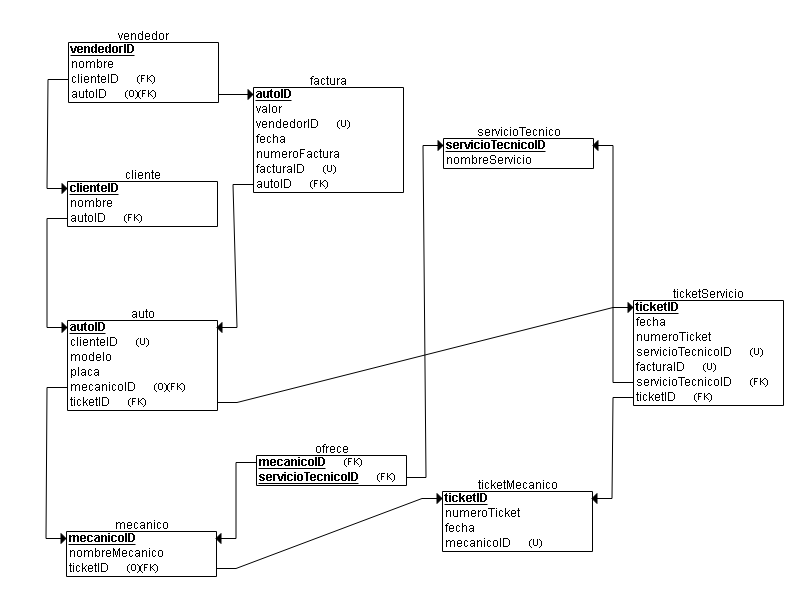)

# **(III) Inserte aquí el script para la creación de tablas.**

```
-- Crear la tabla Vendedor
CREATE TABLE IF NOT EXISTS vendedor (
    vendedorID INTEGER PRIMARY KEY,
    nombre TEXT
);

-- Crear la tabla Cliente
CREATE TABLE IF NOT EXISTS cliente (
    clienteID INTEGER PRIMARY KEY,
    Nombre TEXT
);

-- Crear la tabla Auto
CREATE TABLE IF NOT EXISTS auto (
    autoID INTEGER PRIMARY KEY,
    placa TEXT,
    modelo TEXT,
    clienteID INTEGER,
    FOREIGN KEY (clienteID) REFERENCES cliente(clienteID)
);

-- Crear la tabla Factura
CREATE TABLE IF NOT EXISTS factura (
    FacturaID INTEGER PRIMARY KEY,
    NumeroFactura TEXT,
    fecha DATE,
    vendedorID INTEGER,
    autoID INTEGER,
    valor REAL,
    FOREIGN KEY (vendedorID) REFERENCES vendedor(vendedorID),
    FOREIGN KEY (autoID) REFERENCES auto(autoID)
);

-- Crear la tabla ServicioTécnico
CREATE TABLE IF NOT EXISTS servicioTecnico (
    servicioTecnicoID INTEGER PRIMARY KEY,
    nombreServicio TEXT
);

-- Crear la tabla TicketServicio
CREATE TABLE IF NOT EXISTS ticketServicio (
    ticketID INTEGER PRIMARY KEY,
    numeroTicket TEXT,
    fecha DATE,
    servicioTecnicoID INTEGER,
    FOREIGN KEY (servicioTecnicoID) REFERENCES servicioTécnico(servicioTecnicoID)
);

-- Crear la tabla Mecánico
CREATE TABLE IF NOT EXISTS mecanico (
    mecanicoID INTEGER PRIMARY KEY,
    nombreMecanico TEXT
);

-- Crear la tabla AutoMecanico
CREATE TABLE IF NOT EXISTS autoMecanico (
    autoID INTEGER,
    mecanicoID INTEGER,
    FOREIGN KEY (autoID) REFERENCES auto(autoID),
    FOREIGN KEY (mecanicoID) REFERENCES mecanico(mecanicoID)
);

-- Crear la tabla TicketMecanico
CREATE TABLE IF NOT EXISTS ticketMecanico (
    ticketID INTEGER PRIMARY KEY,
    numeroTicket TEXT,
    fecha DATE,
    mecanicoID INTEGER,
    FOREIGN KEY (mecanicoID) REFERENCES mecanico(mecanicoID)
);
```

# **(IV) Inserte aquí el script para la inserción de registros.**

```
-- Insertar registros en la tabla Vendedor
INSERT INTO vendedor (nombre) VALUES ('Claudio');
INSERT INTO vendedor (nombre) VALUES ('Manuel');
INSERT INTO vendedor (nombre) VALUES ('Martín');
INSERT INTO vendedor (nombre) VALUES ('Ismael');

-- Insertar registros en la tabla Cliente
INSERT INTO cliente (Nombre) VALUES ('Nicolás');
INSERT INTO cliente (Nombre) VALUES ('Rodrigo');
INSERT INTO cliente (Nombre) VALUES ('José');

-- Insertar registros en la tabla Auto
INSERT INTO auto (placa, modelo, clienteID) VALUES ('ABC123', 'Modelo1', 1);
INSERT INTO auto (placa, modelo, clienteID) VALUES ('XYZ789', 'Modelo2', 2);
INSERT INTO auto (placa, modelo, clienteID) VALUES ('FK299S', 'Modelo3', 1);
INSERT INTO auto (placa, modelo, clienteID) VALUES ('LSK2LO', 'Modelo4', 3);
INSERT INTO auto (placa, modelo, clienteID) VALUES ('SKDM19', 'Modelo5', 1);

-- Insertar registros en la tabla Factura
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC001', '2023-10-15', 2, 1, 10000.00);
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC002', '2023-10-16', 2, 2, 12000.00);
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC003', '2023-10-17', 3, 3, 13500.00);
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC004', '2023-10-18', 3, 4, 15250.00);
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC005', '2023-10-19', 4, 5, 15250.00);
INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC006', '2023-10-20', 3, 2, 11000.00);

-- Insertar registros en la tabla ServicioTécnico
INSERT INTO servicioTecnico (nombreServicio) VALUES ('Mantenimiento');
INSERT INTO servicioTecnico (nombreServicio) VALUES ('Reparación');
INSERT INTO servicioTecnico (nombreServicio) VALUES ('Personalización');

-- Insertar registros en la tabla TicketServicio
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK001', '2023-10-17', 1);
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK002', '2023-10-18', 2);
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK003', '2023-10-19', 3);
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK004', '2023-10-20', 3);
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK005', '2023-8-2', 1);
INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK006', '2023-8-21', 3);

-- Insertar registros en la tabla Mecánico
INSERT INTO mecanico (nombreMecanico) VALUES ('Jorge');
INSERT INTO mecanico (nombreMecanico) VALUES ('Benjamín');
INSERT INTO mecanico (nombreMecanico) VALUES ('Ezequiel');
INSERT INTO mecanico (nombreMecanico) VALUES ('Antonio');

-- Insertar registros en la tabla TicketMecanico
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK001', '2023-10-15', 1);
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK002', '2023-10-16', 2);
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK003', '2023-10-17', 1);
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK004', '2023-10-18', 3);
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK005', '2023-10-19', 3);
INSERT INTO ticketMecanico (numeroTicket, fecha, mecanicoID) VALUES ('TICK006', '2023-10-20', 3);
```








# **(V) Implementación de la BD y respuestas a los requerimientos.**
\

##**Preliminares (crear tablas, insertar registros,conectarse a la BD, consultar el catálogo de la BD, etc.)**

In [1]:
#Su código aqui...

import sqlite3

#conectar a la base de datos (o crearla si no existe)
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

#crear las tablas
cursor.execute('''
    CREATE TABLE IF NOT EXISTS vendedor (
        vendedorID INTEGER PRIMARY KEY,
        nombre TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS cliente (
        clienteID INTEGER PRIMARY KEY,
        Nombre TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS auto (
        autoID INTEGER PRIMARY KEY,
        placa TEXT,
        modelo TEXT,
        clienteID INTEGER,
        FOREIGN KEY (clienteID) REFERENCES cliente(clienteID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS factura (
        facturaID INTEGER PRIMARY KEY,
        NumeroFactura TEXT,
        fecha DATE,
        vendedorID INTEGER,
        autoID INTEGER,
        valor REAL,
        FOREIGN KEY (VendedorID) REFERENCES Vendedor(VendedorID),
        FOREIGN KEY (autoID) REFERENCES auto(autoID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS servicioTecnico (
        servicioTecnicoID INTEGER PRIMARY KEY,
        nombreServicio TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS ticketServicio (
        ticketID INTEGER PRIMARY KEY,
        numeroTicket TEXT,
        fecha DATE,
        servicioTecnicoID INTEGER,
        facturaID INTEGER,
        FOREIGN KEY (servicioTecnicoID) REFERENCES servicioTecnico(servicioTecnicoID)
        FOREIGN KEY (facturaID) REFERENCES factura(facturaID)
    )
''')


cursor.execute('''
    CREATE TABLE IF NOT EXISTS mecanico (
        mecanicoID INTEGER PRIMARY KEY,
        nombreMecanico TEXT
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS autoMecanico (
        autoID INTEGER,
        mecanicoID INTEGER,
        FOREIGN KEY (autoID) REFERENCES auto(autoID),
        FOREIGN KEY (mecanicoID) REFERENCES mecanico(mecanicoID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS ticketMecanico (
        ticketID INTEGER PRIMARY KEY,
        numeroTicket TEXT,
        fecha DATE,
        mecanicoID INTEGER,
        FOREIGN KEY (mecanicoID) REFERENCES mecanico(mecanicoID)
    )
''')

#ahora se tienen que insertar los datos en las respectivas tablas para poder trabajar con ellos luego.

#tabla vendedor
cursor.execute("INSERT INTO vendedor (nombre) VALUES ('Claudio')")
cursor.execute("INSERT INTO vendedor (nombre) VALUES ('Manuel')")
cursor.execute("INSERT INTO vendedor (nombre) VALUES ('Martín')")
cursor.execute("INSERT INTO vendedor (nombre) VALUES ('Ismael')")

#tabla cliente
cursor.execute("INSERT INTO cliente (nombre) VALUES ('Nicolás')")
cursor.execute("INSERT INTO cliente (nombre) VALUES ('Rodrigo')")
cursor.execute("INSERT INTO cliente (nombre) VALUES ('josé')")

#tabla auto
cursor.execute("INSERT INTO auto (placa, modelo, clienteID) VALUES ('ABC123', 'Modelo1', 1)")
cursor.execute("INSERT INTO auto (placa, modelo, clienteID) VALUES ('XYZ789', 'Modelo2', 2)")
cursor.execute("INSERT INTO auto (placa, modelo, clienteID) VALUES ('FK299S', 'Modelo3', 1)")
cursor.execute("INSERT INTO auto (placa, modelo, clienteID) VALUES ('LSK2LO', 'Modelo4', 3)")
cursor.execute("INSERT INTO auto (placa, modelo, clienteID) VALUES ('SKDM19', 'Modelo5', 1)")


#tabla factura
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC001', '2023-10-15', 2, 1, 10000.00)")
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC002', '2023-10-16', 2, 2, 12000.00)")
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC003', '2023-10-17', 3, 3, 13500.00)")
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC004', '2023-10-18', 3, 4, 15250.00)")
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC005', '2023-10-19', 4, 5, 15250.00)")
cursor.execute("INSERT INTO factura (NumeroFactura, fecha, vendedorID, autoID, valor) VALUES ('FAC006', '2023-10-20', 3, 2, 11000.00)")

#tabla ServicioTécnico
cursor.execute("INSERT INTO servicioTecnico (nombreServicio) VALUES ('Mantenimiento')")
cursor.execute("INSERT INTO servicioTecnico (nombreServicio) VALUES ('Reparación')")
cursor.execute("INSERT INTO servicioTecnico (nombreServicio) VALUES ('Personalización')")

#tabla TicketServicio
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK001', '2023-10-15', 1)")
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK002', '2023-10-16', 2)")
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK003', '2023-10-17', 3)")
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK004', '2023-10-18', 3)")
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK005', '2023-10-19', 1)")
cursor.execute("INSERT INTO ticketServicio (numeroTicket, fecha, servicioTecnicoID) VALUES ('TICK006', '2023-10-20', 3)")

#tabla mecanico
cursor.execute("INSERT INTO mecanico (nombreMecanico) VALUES ('Jorge')")
cursor.execute("INSERT INTO mecanico (nombreMecanico) VALUES ('Benjamín')")
cursor.execute("INSERT INTO mecanico (nombreMecanico) VALUES ('Ezequiel')")
cursor.execute("INSERT INTO mecanico (nombreMecanico) VALUES ('Antonio')")

#tabla ticketmecanico
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK001', '2023-10-15', 1)")
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK002', '2023-10-16', 2)")
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK003', '2023-10-17', 1)")
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK004', '2023-10-18', 3)")
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK005', '2023-10-19', 3)")
cursor.execute("INSERT INTO ticketMecanico (NumeroTicket, Fecha, MecanicoID) VALUES ('TICK006', '2023-10-20', 3)")

#guardar los cambios en la base de datos y cerrar la conexión
conn.commit()
conn.close()


##**Consulta 1**

In [2]:
#Su código aqui...

import sqlite3
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

#consulta para obtener los mecanicos que han realizado más trabajos en el último año
cursor.execute('''
    SELECT mecanico.nombreMecanico, COUNT(ticketMecanico.mecanicoID) AS TotalTrabajos
    FROM mecanico
    INNER JOIN ticketMecanico ON mecanico.mecanicoID = ticketMecanico.mecanicoID
    WHERE DATE(ticketMecanico.fecha) >= DATE('now', '-1 year')
    GROUP BY mecanico.nombreMecanico
    ORDER BY TotalTrabajos DESC;
''')

result = cursor.fetchall()

#imprimir los resultados
print("Mecánicos que han realizado la mayor cantidad de trabajos en el último año:\n")
for row in result:
    print("Mecánico:", row[0])
    print("Total trabajos:", row[1])
    print("------------")

conn.close()


Mecánicos que han realizado la mayor cantidad de trabajos en el último año:

Mecánico: Ezequiel
Total trabajos: 3
------------
Mecánico: Jorge
Total trabajos: 2
------------
Mecánico: Benjamín
Total trabajos: 1
------------


##**Consulta 2**

In [3]:
#Su código aqui...

import sqlite3
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

#consulta para obtener el servicio más frecuente
cursor.execute('''
    SELECT servicioTecnico.nombreServicio, COUNT(ticketServicio.servicioTecnicoID) AS TotalServicios
    FROM servicioTecnico
    LEFT JOIN ticketServicio ON servicioTecnico.servicioTecnicoID = ticketServicio.servicioTecnicoID
    GROUP BY servicioTecnico.nombreServicio
    ORDER BY TotalServicios DESC
    LIMIT 1;
''')

#resultado final
result = cursor.fetchone()
print("Nombre servicio más frecuente:", result[0])
print("Total realizados:", result[1])

conn.close()

Nombre servicio más frecuente: Personalización
Total realizados: 3


##**Consulta 3**

In [4]:
#Su código aqui...

import sqlite3
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

# Consulta para obtener el top 3 de vendedores
cursor.execute('''
    SELECT Vendedor.Nombre, COUNT(Factura.VendedorID) AS TotalVentas
    FROM Vendedor
    INNER JOIN Factura ON Vendedor.VendedorID = Factura.VendedorID
    GROUP BY Vendedor.Nombre
    ORDER BY TotalVentas DESC
    LIMIT 3;
''')

#resultados
result = cursor.fetchall()
print("Top 3 de Vendedores de Autos:")
for idx, row in enumerate(result, start=1):
    print("Posición", idx)
    print("Nombre:", row[0])
    print("Total ventas:", row[1])
    print("-----------")

conn.close()

Top 3 de Vendedores de Autos:
Posición 1
Nombre: Martín
Total ventas: 3
-----------
Posición 2
Nombre: Manuel
Total ventas: 2
-----------
Posición 3
Nombre: Ismael
Total ventas: 1
-----------


##**Consulta 4**

In [5]:
#Su código aqui...

import sqlite3
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

nombre_cliente = 'Nicolás'

#consulta para obtener el detalle de los servicios para un cliente
consulta = '''
    SELECT
        cliente.Nombre AS Cliente,
        auto.placa AS Placa,
        auto.modelo AS Modelo,
        factura.valor AS Valor,
        ticketServicio.numeroTicket AS NumeroTicket
    FROM
        cliente
    INNER JOIN auto ON cliente.clienteID = auto.clienteID
    INNER JOIN factura ON auto.autoID = factura.autoID
    LEFT JOIN ticketServicio ON factura.facturaID = ticketServicio.facturaID
    WHERE
        cliente.Nombre = ?
'''

#ejecutar la consulta y obtener los resultados
cursor.execute(consulta, (nombre_cliente,))
resultados = cursor.fetchall()

#imprimir los resultados
for fila in resultados:
    print(f'Cliente: {fila[0]}')
    print(f'Placa: {fila[1]}')
    print(f'Modelo: {fila[2]}')
    print(f'Valor: {fila[3]}')
    print(f'Número de Ticket: {fila[4]}')
    print('---')

conn.close()

Cliente: Nicolás
Placa: ABC123
Modelo: Modelo1
Valor: 10000.0
Número de Ticket: None
---
Cliente: Nicolás
Placa: FK299S
Modelo: Modelo3
Valor: 13500.0
Número de Ticket: None
---
Cliente: Nicolás
Placa: SKDM19
Modelo: Modelo5
Valor: 15250.0
Número de Ticket: None
---


##**Consulta 5**

In [6]:
#Su código aqui...

import sqlite3
conn = sqlite3.connect('concesionario.db')
cursor = conn.cursor()

#consulta 1: promedio de valor de facturas por vendedor
cursor.execute('''
    SELECT vendedor.nombre, AVG(factura.valor) AS promedio_valor
    FROM vendedor
    LEFT JOIN factura ON vendedor.vendedorID = factura.vendedorID
    GROUP BY vendedor.vendedorID
''')

resultados = cursor.fetchall()
print("Consulta 1: Promedio de valor de facturas por vendedor ('None' en caso de ser 'x<=1')")
for row in resultados:
    print(f"{row[0]}: {row[1]}")

print("\n")

#consulta 2: Número de autos por cliente
cursor.execute('''
    SELECT c.Nombre AS Cliente, COUNT(a.placa) AS NumeroDeAutos
    FROM cliente AS c
    LEFT JOIN auto AS a ON c.clienteID = a.clienteID
    GROUP BY c.clienteID
    ORDER BY Cliente
''')

resultados = cursor.fetchall()
print("Consulta: Número de autos por cliente")
for row in resultados:
    print(f"Cliente: {row[0]}, Número de Autos: {row[1]}")

conn.close()

Consulta 1: Promedio de valor de facturas por vendedor ('None' en caso de ser 'x<=1')
Claudio: None
Manuel: 11000.0
Martín: 13250.0
Ismael: 15250.0


Consulta: Número de autos por cliente
Cliente: Nicolás, Número de Autos: 3
Cliente: Rodrigo, Número de Autos: 1
Cliente: josé, Número de Autos: 1
